## sklearn GP regression and plotting code

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

X_RANGE = [0, 1]
N_RAW = int(1e5)
N_TRAIN = int(N_RAW * 0.01)

X_RAW = np.linspace(*X_RANGE, N_RAW)
X_TRAIN = np.random.choice(X_RAW, N_TRAIN)


class Regressor():
    def __init__(self, inputs, num_outputs):
        self.inputs = inputs
        self.model = self.build_and_compile_model(num_outputs)
        self.train_time = 0
        self.history = None

    def build_and_compile_model(self, num_outputs: int):
        model = keras.Sequential([
            self.normalising_layer(),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(16, activation='relu'),
            layers.Dense(16, activation='relu'),
            layers.Dense(num_outputs),
        ])
        model.compile(
            loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.Adam(0.001)
        )
        return model

    def train(self, x, y, epochs=100):
        self.history = self.model.fit(
            x, y,
            epochs=epochs,
            verbose=0,
            # Calculate validation results on 20% of the training data.
            validation_split=0.3,
            # callbacks=[tf.keras.callbacks.EarlyStopping(patience=25, min_delta=1e-4)]
        )

    def normalising_layer(self):
        normalizer = layers.Normalization(input_shape=[1, ], axis=None)
        normalizer.adapt(np.array(self.inputs))
        return normalizer

    def __call__(self, data):
        return self.model.predict(data, verbose=0)

    def summary(self):
        self.model.summary()

    def plot_history(self):
        hist = self.history.history
        fig, ax = plt.subplots(1, 1, figsize=(5, 3))
        ax.plot(hist['loss'], label='loss', lw=5)
        ax.plot(hist['val_loss'], label='val_loss', lw=5)
        plt.xlabel('Epoch')
        plt.ylabel('Error [MPG]')
        plt.legend(frameon=False)
        plt.tight_layout()
        plt.grid(True)


def plot_data(x_raw, x_train, true_model, regression_model=None):
    x_train = np.sort(x_train)
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    l_kwgs = dict(lw=5, alpha=0.2)
    s_kwgs = dict(s=1, zorder=10)
    ax.plot(x_raw, true_model(x_raw), label=f"Raw ({N_RAW} pts)", color='C0', **l_kwgs)
    ax.scatter(x_train, true_model(x_train), label=f"Train ({N_TRAIN} pts)", color="C0", **s_kwgs)
    if regression_model:
        y_pred_raw = regression_model(x_raw)
        y_pred_train = regression_model(x_train)
        ax.plot(x_raw, y_pred_raw, label="Pred (Raw)", color='C3', **l_kwgs)
        ax.scatter(x_train, y_pred_train, label='Pred (Train)', color='C3', **s_kwgs)
    ax.set_xlim(*X_RANGE)
    ax.set_xlabel("X Data")
    ax.set_ylabel("Y Data")
    ax.legend(frameon=False)
    plt.tight_layout()


def make_regressor_and_test(x_data, true_model, epochs=100):
    ml_model = Regressor(x_data, num_outputs=1)
    ml_model.summary()
    ml_model.train(x_data, true_model(x_data), epochs)
    ml_model.plot_history()
    plot_data(X_RAW, X_TRAIN, true_model, ml_model)
    return ml_model


### Linear data

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_18 (Dense)            (None, 64)                128       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                      

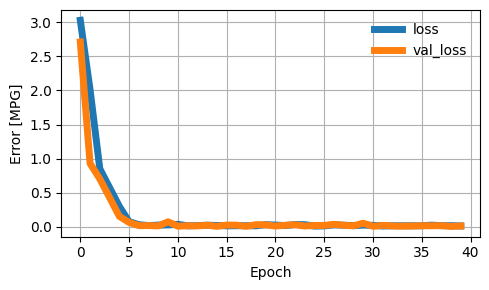

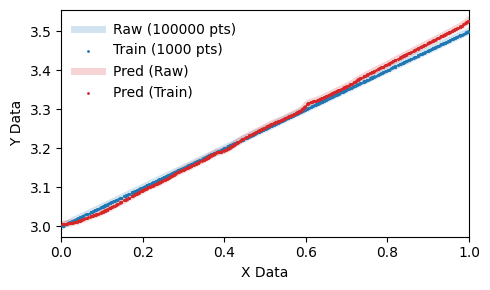

In [6]:
line_f = lambda x: 0.5 * x + 3
line_regressor = make_regressor_and_test(X_TRAIN, line_f, 40)

### Sine curve

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_24 (Dense)            (None, 64)                128       
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                      

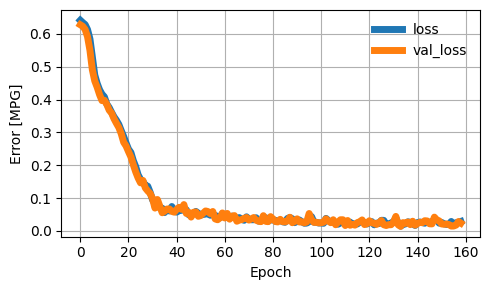

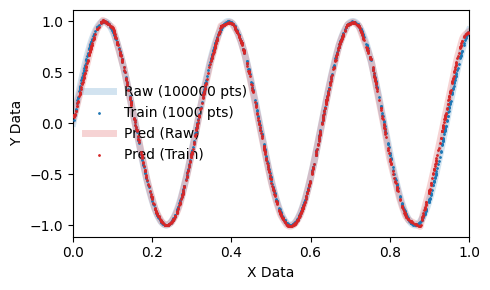

In [7]:
sin_f = lambda x: np.sin(x*20)
sin_regressor = make_regressor_and_test(X_TRAIN, sin_f, 300)

### Funky curve

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_36 (Dense)            (None, 64)                128       
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dense_40 (Dense)            (None, 16)                272       
                                                      

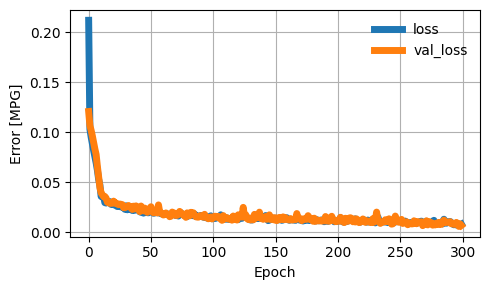

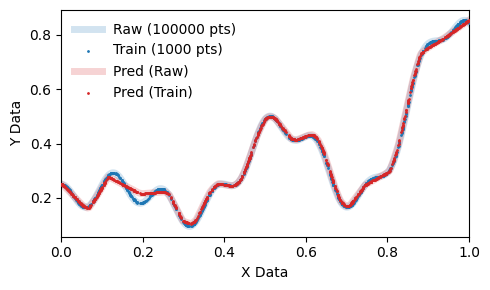

In [10]:
curvy_f = lambda x: 0.2 + 0.4 * x ** 2 + 0.3 * x * np.sin(15 * x) + 0.05 * np.cos(50 * x)
curvy_regressor = make_regressor_and_test(X_TRAIN, curvy_f, 300)